# EDA 1
---  
実施日: 2021/09/05  
訓練データへのエンジニアリングも実施済

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px  
import seaborn as sns 
import sympy
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [3]:
df = pd.read_csv("../data/raw/train.csv")
df = df.drop("id", axis=1)
df.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,42,Male,0.786362,0.154075,162.267801,26.053979,37.413395,6.041335,3.584788,0.793957,1
1,65,Female,0.939515,0.174262,175.315396,14.346785,11.606569,6.249220,3.499155,0.954351,0
2,29,Male,1.221597,0.374223,151.164721,13.226549,11.109054,6.752648,3.498901,1.065019,1
3,65,Female,0.889107,0.122545,177.429034,15.376386,15.247101,6.333087,3.440847,0.953817,0
4,59,Male,1.990933,0.603734,183.793499,23.202757,54.162685,6.128990,2.560995,0.958612,0


In [4]:
df.isnull().sum()

Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
disease     0
dtype: int64

In [5]:
df.describe(include=[object])

,Gender
count,3500
unique,2
top,Male
freq,2930


In [6]:
df.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.325429,1.919269,0.709048,225.932791,39.925959,39.089220,6.485785,3.612211,0.878517,0.413143
std,15.817554,3.330010,1.783347,184.208038,120.534839,53.627868,0.871500,0.713799,0.230845,0.492468
min,3.000000,0.553789,0.040161,129.185799,7.150973,10.565631,3.288138,1.884264,0.366190,0.000000
25%,33.000000,0.841287,0.142479,164.143621,15.777688,16.317539,6.019990,3.036498,0.730434,0.000000
50%,48.000000,0.930300,0.182612,174.094572,18.228538,20.736926,6.596425,3.619430,0.957417,0.000000
75%,58.000000,1.161300,0.335234,188.749662,24.438192,38.513803,7.140297,4.237270,0.998466,1.000000
max,75.000000,27.310913,16.300769,1866.147334,1645.254290,577.200793,8.046774,4.701661,2.651567,1.000000


In [53]:
s = StandardScaler()
pd.DataFrame(s.fit_transform(df) * 10, columns=df.columns).describe()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,M_Bil,ast_alt_ratio,FIB_4,Gr
count,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03
mean,-1.883953e-15,-7.146030e-16,-3.085786e-16,7.755066e-16,-4.385064e-16,3.857232e-16,1.218073e-16,-2.212833e-15,1.445447e-15,-4.324160e-15,-5.359522e-16,4.628678e-16,-1.201832e-15,-1.546953e-15,-5.128088e-15
std,1.000143e+01,1.000143e+01,1.000143e+01,1.000143e+01,1.000143e+01,1.000143e+01,1.000143e+01,1.000143e+01,1.000143e+01,1.000143e+01,1.000143e+01,1.000143e+01,1.000143e+01,1.000143e+01,1.000143e+01
min,-2.676234e+01,-4.410660e+00,-4.101115e+00,-3.751271e+00,-5.252801e+00,-2.719518e+00,-5.319560e+00,-3.669655e+01,-2.421121e+01,-2.219675e+01,-8.390424e+00,-8.022199e+01,-1.172425e+01,-1.006023e+01,-3.356458e+01
25%,-7.793360e+00,-4.410660e+00,-3.237634e+00,-3.177451e+00,-3.354794e+00,-2.003713e+00,-4.246847e+00,-5.345525e+00,-8.066632e+00,-6.415737e+00,-8.390424e+00,-2.633725e+00,-3.840918e+00,-4.477066e+00,-6.490692e+00
50%,1.691130e+00,-4.410660e+00,-2.970291e+00,-2.952375e+00,-2.814515e+00,-1.800353e+00,-3.422645e+00,1.269706e+00,1.011544e-01,3.418338e+00,-8.390424e+00,-2.179885e+00,-2.481195e+00,-2.325225e+00,-5.118759e-01
75%,8.014123e+00,-4.410660e+00,-2.276501e+00,-2.096437e+00,-2.018828e+00,-1.285104e+00,-1.073135e-01,7.511249e+00,8.758038e+00,5.196815e+00,1.191835e+01,-1.569725e+00,1.172065e+00,9.590361e-01,2.908308e+00
max,1.876321e+01,2.267234e+01,7.626185e+01,8.744203e+01,8.905414e+01,1.332028e+02,1.003561e+02,1.791408e+01,1.526488e+01,7.681786e+01,1.191835e+01,1.158420e+02,1.379408e+02,1.974807e+02,6.003196e+01


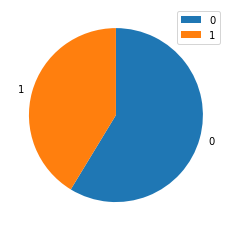

In [7]:
plt.pie(x=df.disease.value_counts().values, labels=df.disease.value_counts().index, startangle=90, counterclock=False)
plt.legend(df.disease.value_counts().index)
plt.show()

In [63]:
df["age_rank"] = pd.cut(df.Age, bins=10, labels=False)
pd.crosstab(df.age_rank, df.Gender)

Gender,0,1
age_rank,,
0,11,3
1,176,21
2,165,51
3,280,77
4,297,44
5,458,62
6,466,105
7,576,83
8,418,114


/home/kooose/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender vs Age by Disease')

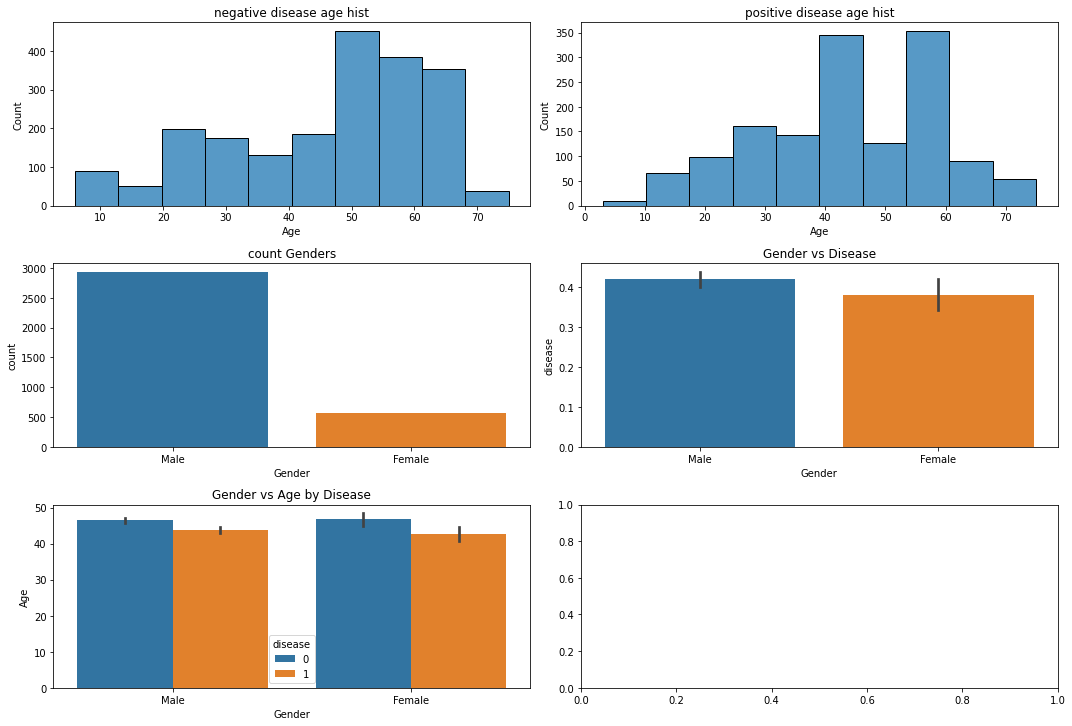

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
ax = axes.ravel()
sns.histplot(df.loc[df.disease == 0, "Age"], ax=ax[0], bins=10)
ax[0].set_title("negative disease age hist")
sns.histplot(df.loc[df.disease == 1, "Age"], ax=ax[1], bins=10)
ax[1].set_title("positive disease age hist")
sns.countplot(df.Gender, ax=ax[2])
ax[2].set_title("count Genders")
sns.barplot(data=df, x="Gender", y="disease", ax=ax[3])
ax[3].set_title("Gender vs Disease")
plt.tight_layout()
sns.barplot(data=df, x="Gender", y="Age", hue="disease", ax=ax[4])
ax[4].set_title("Gender vs Age by Disease")

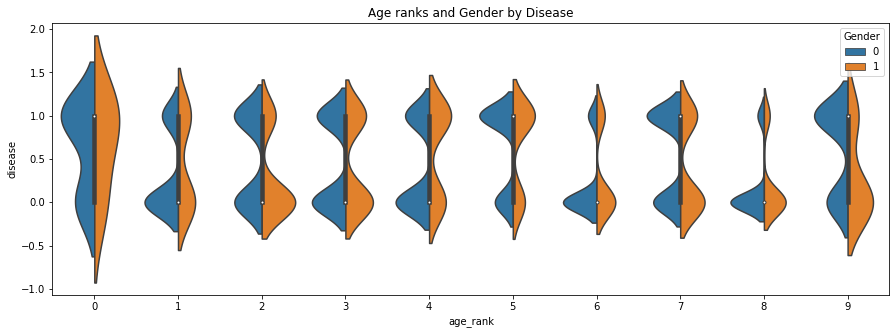

In [48]:
df["age_rank"] = pd.cut(df.Age, bins=10, labels=False)
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x="age_rank", y="disease", hue="Gender", split=True)
plt.title("Age ranks and Gender by Disease")
df.drop("age_rank", axis=1, inplace=True)

男女ともに40, 60台において発症が多い。  
各年齢層、性別ともに大きな分布の開きは見られないが、若年層の女性のみ正規分布化している。

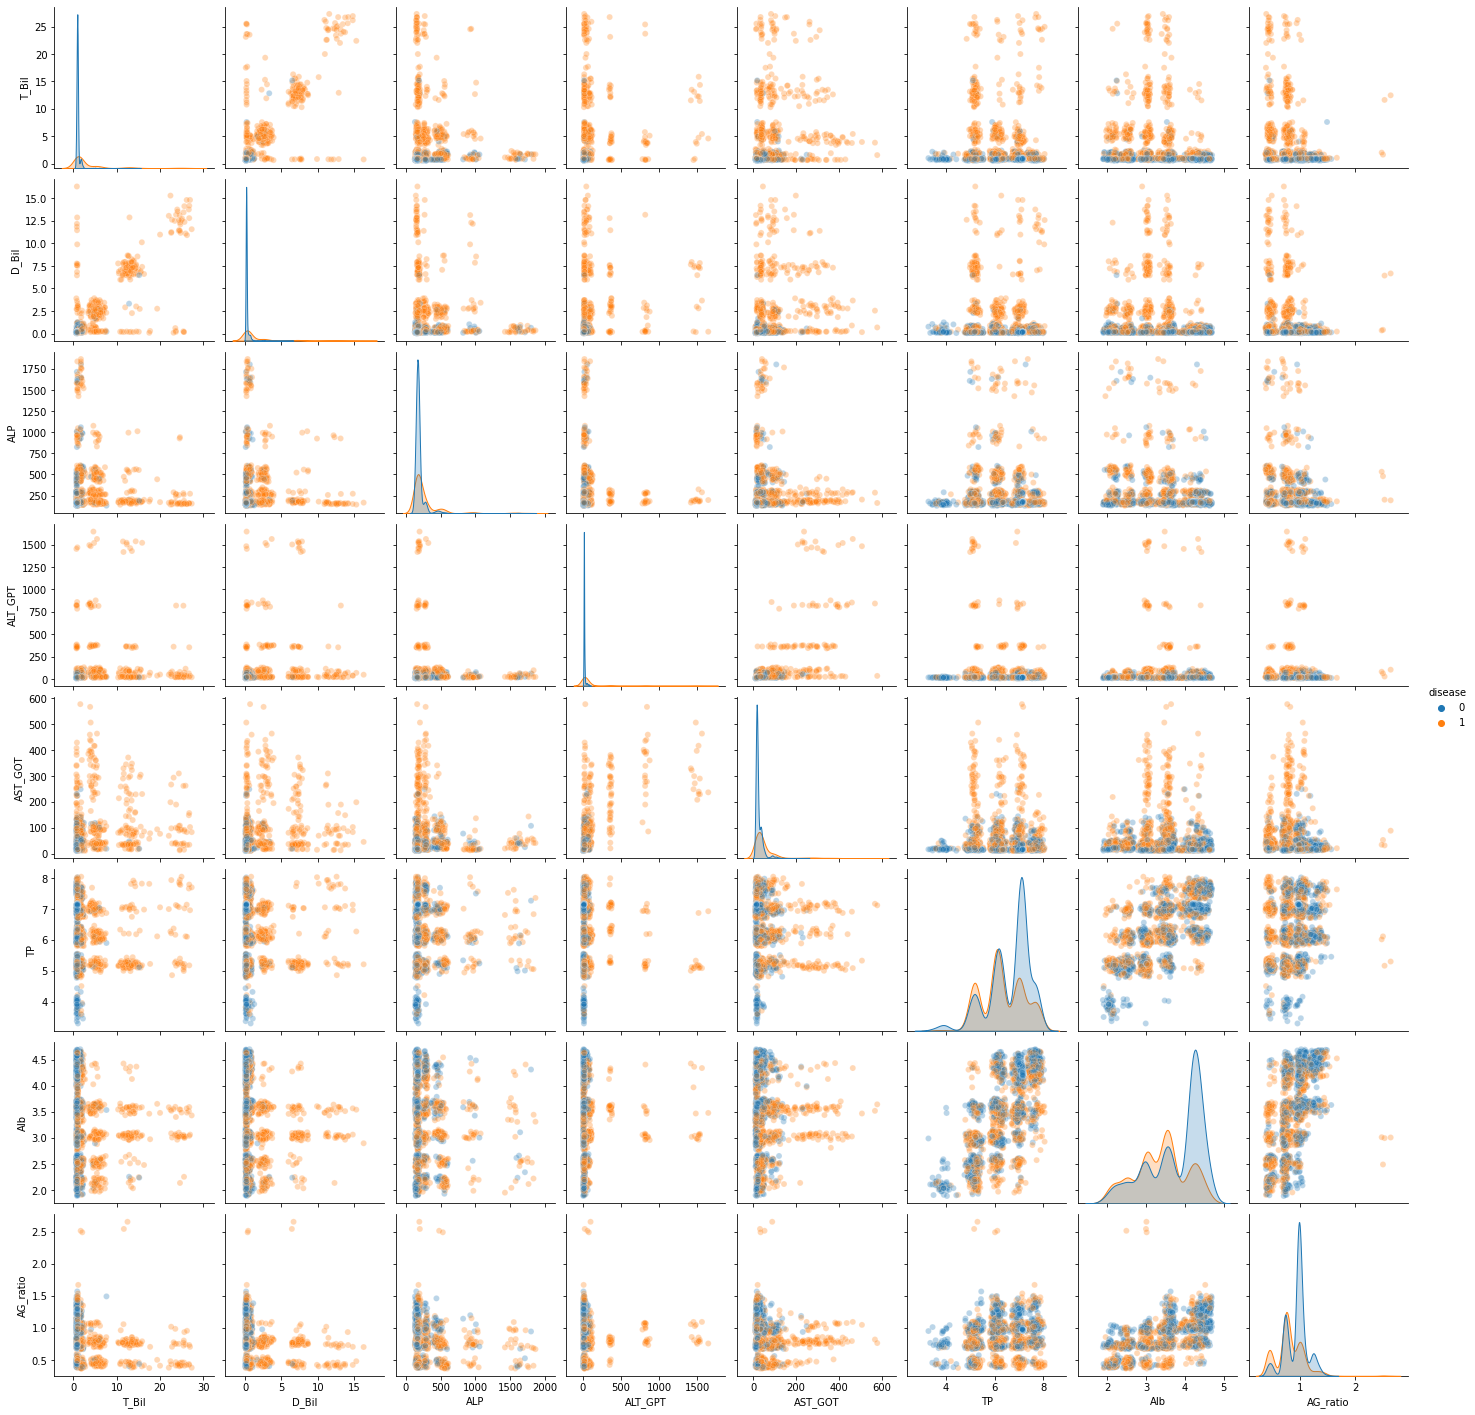

In [9]:
sns.pairplot(df.drop(["Age"], axis=1), hue="disease", plot_kws={"alpha": 0.3})

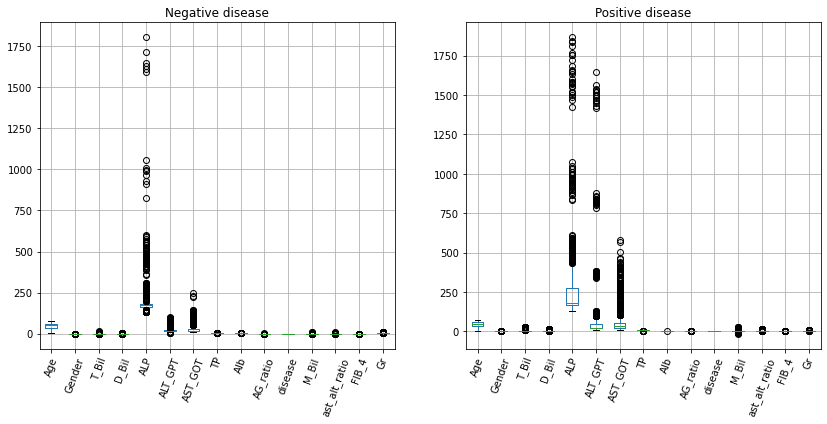

In [49]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
df[df.disease == 0].boxplot()
plt.xticks(rotation=70)
plt.title("Negative disease")
plt.subplot(1, 2, 2)
df[df.disease == 1].boxplot()
plt.xticks(rotation=70)
plt.title("Positive disease")
plt.show()

negative :0.9648971755253164 positive: 3.2749250920179804


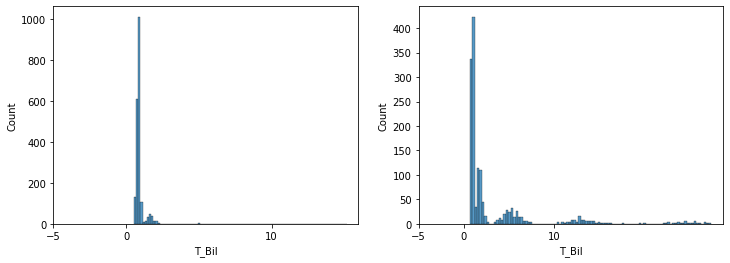

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[df.disease == 0].T_Bil, bins=100)
plt.xticks([-5, 0, 10])
plt.subplot(1, 2, 2)
sns.histplot(df[df.disease == 1].T_Bil, bins=100)
plt.xticks([-5, 0, 10])
print(f"negative :{df.loc[df.disease == 0, 'T_Bil'].mean()} positive: {df.loc[df.disease == 1, 'T_Bil'].mean()}")

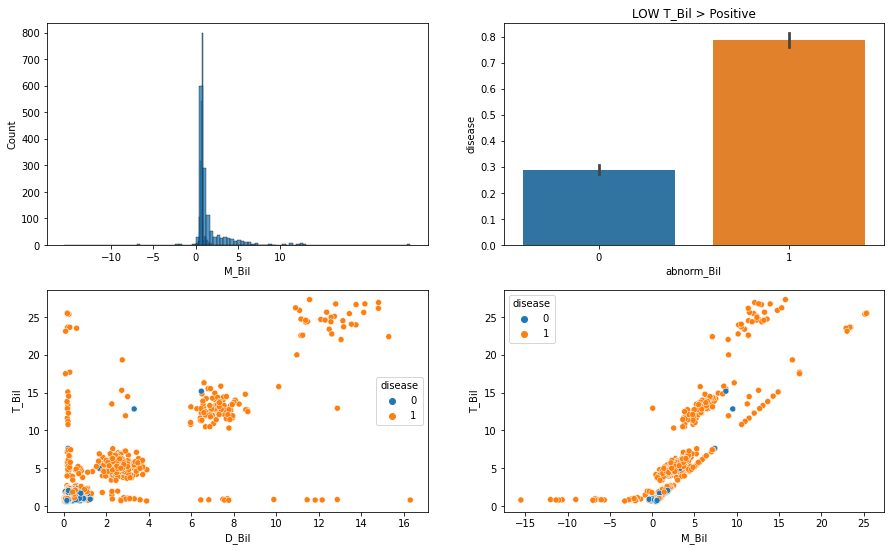

In [16]:
def t_bil(x):
    if x > 1.2:
        return 1 
    elif x < 0.2:
        return 2
    else:
        return 0
df["abnorm_Bil"] = df.T_Bil.apply(t_bil)
df["M_Bil"] = df.T_Bil - df.D_Bil 

fig, axes = plt.subplots(2, 2, figsize=(15, 9))
ax = axes.ravel()
sns.histplot(df.loc[df.disease == 0, "M_Bil"], ax=ax[0], bins=100)
sns.histplot(df.loc[df.disease == 1, "M_Bil"], ax=ax[0], bins=100)
ax[0].set_xticks([-10, -5, 0, 5, 10])
sns.barplot(data=df, x="abnorm_Bil", y="disease", ax=ax[1])
ax[1].set_title("LOW T_Bil > Positive")
sns.scatterplot(data=df, x="D_Bil", y="T_Bil", hue="disease", ax=ax[2])
sns.scatterplot(data=df, x="M_Bil", y="T_Bil", hue="disease", ax=ax[3])
df.drop(["abnorm_Bil"], axis=1, inplace=True)

総ヒルピビン基準値として**0.2-1.2mg**。数値が高いほど病気の疑いが高くなる。  
間接ヒルピビンは処理前の赤血球で直接ヒルピビンは処理後

/home/kooose/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kooose/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


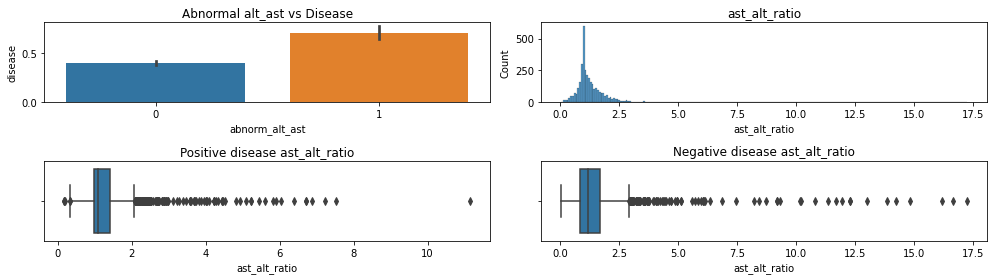

In [65]:
df["ast_alt_ratio"] = df.AST_GOT / df.ALT_GPT
df["abnorm_alt_ast"] = df["ast_alt_ratio"].apply(lambda x: 1 if x >= 3.0 or x <= 0.333 else 0) # 比率が２倍以上か
fig, axes = plt.subplots(2, 2 , figsize=(14, 4))
ax = axes.ravel()
sns.barplot(data=df, x="abnorm_alt_ast", y="disease", ax=ax[0])
ax[0].set_title("Abnormal alt_ast vs Disease")
sns.histplot(df.ast_alt_ratio, ax=ax[1])
ax[1].set_title("ast_alt_ratio")
sns.boxplot(df.loc[df.disease == 0, "ast_alt_ratio"], ax=ax[2])
ax[2].set_title("Positive disease ast_alt_ratio")
sns.boxplot(df.loc[df.disease == 1, "ast_alt_ratio"], ax=ax[3])
ax[3].set_title("Negative disease ast_alt_ratio")
df.drop(["abnorm_alt_ast"], axis=1, inplace=True)
plt.tight_layout()

独自の算出手法として`FIB_4_index`という計算式がある。  
```
(年齢*AST) / (血小板数*sqrt(ALT))
```  
血小板数が不明のため、基準値の最小値である130000.0を用いる。

/home/kooose/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kooose/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


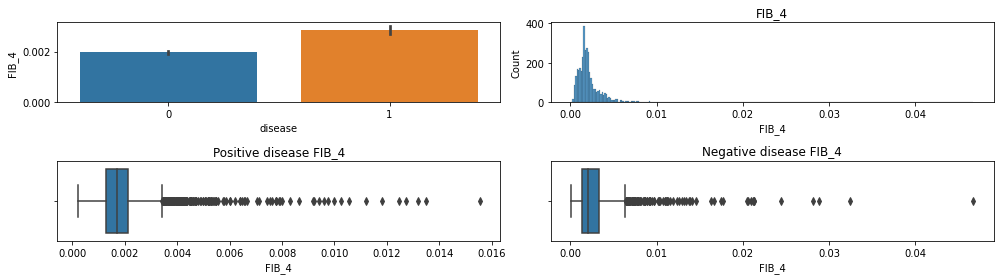

In [28]:
df["FIB_4"] = (df.Age*df.AST_GOT)/(130000.0*np.sqrt(df.ALT_GPT))
df["FIB_4"] = df["FIB_4"].fillna(df["FIB_4"].mean())
fig, axes = plt.subplots(2, 2, figsize=(14, 4))
ax = axes.ravel()
sns.barplot(data=df, x="disease", y="FIB_4", ax=ax[0])
sns.histplot(df.FIB_4, ax=ax[1])
ax[1].set_title("FIB_4")
sns.boxplot(df.loc[df.disease == 0, "FIB_4"], ax=ax[2])
ax[2].set_title("Positive disease FIB_4")
sns.boxplot(df.loc[df.disease == 1, "FIB_4"], ax=ax[3])
ax[3].set_title("Negative disease FIB_4")
plt.tight_layout()

アルブミン/グロブリン比からグロブリンの作成

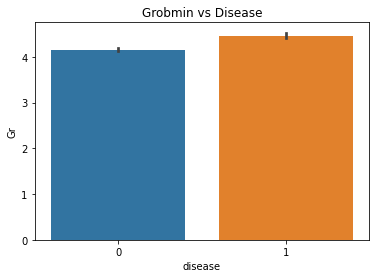

In [29]:
df["Gr"] = df.Alb/df.AG_ratio
sns.barplot(data=df, x="disease", y="Gr")
plt.title("Grobmin vs Disease")
plt.show()

In [15]:
def c(x):
    if x == np.inf:
        return df.FIB
    else:
        return x 
df["FIB_4"] = df.FIB_4.apply(c)

In [36]:
df["Gender"] = df.Gender.map({"Female": 1, "Male": 0})
df.to_csv("../data/processed/train.csv", index=False)

In [37]:
df.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,M_Bil,ast_alt_ratio,FIB_4,Gr
0,42,0,0.786362,0.154075,162.267801,26.053979,37.413395,6.041335,3.584788,0.793957,1,0.632287,1.435995,0.002368,4.515089
1,65,1,0.939515,0.174262,175.315396,14.346785,11.606569,6.249220,3.499155,0.954351,0,0.765252,0.809001,0.001532,3.666530
2,29,0,1.221597,0.374223,151.164721,13.226549,11.109054,6.752648,3.498901,1.065019,1,0.847375,0.839906,0.000681,3.285295
3,65,1,0.889107,0.122545,177.429034,15.376386,15.247101,6.333087,3.440847,0.953817,0,0.766561,0.991592,0.001944,3.607450
4,59,0,1.990933,0.603734,183.793499,23.202757,54.162685,6.128990,2.560995,0.958612,0,1.387199,2.334321,0.005103,2.671566
